<a href="https://colab.research.google.com/github/ChaaruVijay/DSPL-CourseWork/blob/main/KNN_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
#Read in the data using pandas
df = pd.read_csv('/content/train_cleaned.csv')
#Check a sample of the dataset
df.head()

,outlet_city,luxury_sales,fresh_sales,dry_sales,cluster_catgeory
0,11,1209.60,756.00,5292.00,4.0
1,13,1590.12,1060.08,6007.12,1.0
2,19,2288.88,1481.04,9155.52,4.0
3,19,2274.94,1739.66,9099.76,4.0
4,11,2345.49,2069.55,9243.99,4.0


In [2]:
#list out columns of the dataset
list(df.columns)

['outlet_city', 'luxury_sales', 'fresh_sales', 'dry_sales', 'cluster_catgeory']

In [3]:
#check the number of rows and columns in the dataset
df.shape

(774055, 5)

In [4]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
outlet_city,774055.0,9.382101,5.778086,0.0,4.00,9.00,14.00,19.00
luxury_sales,774055.0,1921.943569,1004.033025,500.0,1213.53,1715.28,2338.69,6999.65
fresh_sales,774055.0,4428.711418,3334.708075,500.0,1620.19,3356.51,6671.70,13997.90
dry_sales,774055.0,4676.276166,3409.399478,500.0,1787.94,3727.76,7162.20,13999.30
cluster_catgeory,774055.0,3.292130,1.867030,1.0,2.00,3.00,5.00,6.00


In [5]:
# To expand e scientific notation
pd.set_option('display.float_format', '{:.2f}'.format)

In [6]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
outlet_city,774055.00,9.38,5.78,0.00,4.00,9.00,14.00,19.00
luxury_sales,774055.00,1921.94,1004.03,500.00,1213.53,1715.28,2338.69,6999.65
fresh_sales,774055.00,4428.71,3334.71,500.00,1620.19,3356.51,6671.70,13997.90
dry_sales,774055.00,4676.28,3409.40,500.00,1787.94,3727.76,7162.20,13999.30
cluster_catgeory,774055.00,3.29,1.87,1.00,2.00,3.00,5.00,6.00


In [7]:
#define feature and target
X = df[['luxury_sales', 'fresh_sales', 'dry_sales']]
y = df['cluster_catgeory']

In [8]:
#check that the list of target variable
y.head()

,cluster_catgeory
0,4.00
1,1.00
2,4.00
3,4.00
4,4.00


In [9]:
from sklearn.model_selection import train_test_split
#split dataset into train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=14, stratify=y)

#This is to show the number of instances and input features in the training and test sets
print('X_train Instances', X_train.shape)
print('X_test Instances', X_test.shape)

X_train Instances (619244, 3)
X_test Instances (154811, 3)


In [10]:
from sklearn.neighbors import KNeighborsClassifier
# Create a KNN classifier
knn = KNeighborsClassifier(n_neighbors = 3)
# Fit the classifier to the data
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [11]:
#Perform predictions on the test data
y_pred=knn.predict(X_test)

#Create a dataframe for comparing the actual vs predicted results by kNN mode
compare_results_knn_df = pd.DataFrame({'Actual':y_test, 'Predicted': y_pred})
compare_results_knn_df

,Actual,Predicted
159789,4.00,4.00
375349,1.00,1.00
118437,4.00,4.00
371430,1.00,1.00
189096,2.00,2.00
...,...,...
731322,3.00,5.00
89374,4.00,4.00
425917,1.00,1.00
246413,2.00,2.00


In [12]:
#evaluate the model
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         1.0       1.00      1.00      1.00     37792
         2.0       1.00      1.00      1.00     31010
         3.0       0.64      0.62      0.63      9778
         4.0       1.00      1.00      1.00     34485
         5.0       0.55      0.57      0.56      7905
         6.0       1.00      1.00      1.00     33841

    accuracy                           0.95    154811
   macro avg       0.86      0.86      0.86    154811
weighted avg       0.95      0.95      0.95    154811



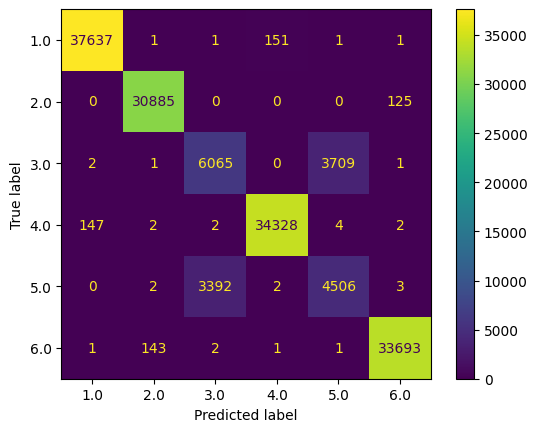

In [14]:
#Import the packages for costructing the confusion matrix
from sklearn.metrics import confusion_matrix
#Import the packages for plotting the confusion matrix
from sklearn.metrics import ConfusionMatrixDisplay

#Costruct the confusion matrix based on…
#comparing actual values (y_test) vs predicted (y_pred) in test data
cm_knn = confusion_matrix(y_test, y_pred, labels = knn.classes_)
#Plot the confusion matrix
disp_knn_cm = ConfusionMatrixDisplay(cm_knn, display_labels=knn.classes_)
disp_knn_cm.plot()